In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# problem1

### the calculated result

$p(i,j)$

$p(0,0)=\frac{1}{8}$

$p(0,1)=\frac{1}{8}$

$p(1,0)=\frac{1}{4}$

$p(1,1)=\frac{1}{2}$

$p(i=0)=\frac{1}{4}$

$p(i=1)=\frac{3}{4}$

$p(j=0)=\frac{3}{8}$

$p(j=1)=\frac{5}{8}$

## let 0 represent (0,0), 1 represent (0,1),2 and 3 represent (1,0), 4 5 6 7 represent (1,1)

In [39]:
a = np.floor(np.random.uniform(0,8,10000))
pd.DataFrame(data = {'p(0,0)':[len(a[a==0])],'p(0,1)':[len(a[a==1])],'p(1,0)':[len(a[a==2])+len(a[a==3])],'p(1,1)':[len(a[a==4])+len(a[a==5])+len(a[a==6])+len(a[a==7])],'p(i=0)':[len(a[a==0])+len(a[a==1])],'p(i=1)':[len(a[a>=2])],'p(j=0)':[len(a[a==0])+len(a[a==2])+len(a[a==3])],'p(j=1)':[len(a[a==1])+len(a[a>=4])]})/10000

,"p(0,0)","p(0,1)","p(1,0)","p(1,1)",p(i=0),p(i=1),p(j=0),p(j=1)
0,0.1287,0.1244,0.2438,0.5031,0.2531,0.7469,0.3725,0.6275


# problem2

## the formular problem provided is equal to numpy.corrcoef

In [50]:
set = np.zeros([10000,2])
for i in range(10000):
    if a[i] <= 1:
        set[i,0]=0
    else: set[i,0]=1
    
    if a[i] ==0 or a[i] ==2 or a[i] ==3:
        set[i,1]=0
    else: set[i,1]=1
np.corrcoef(set.T)[0,1]

0.1637444973646146

# problem3

In [52]:
n = 10000
p = 0.5
set1 = np.random.geometric(p,n)
set2 = np.random.geometric(p,n)
set = set1+set2
for i in range(2,20):
    print('estimated p(%d) = %f, true p(%d) = %f' %(i,len(set[set==i])/n,i,p**2*(i-1)*(1-p)**(i-2)))

estimated p(2) = 0.243000, true p(2) = 0.250000
estimated p(3) = 0.248500, true p(3) = 0.250000
estimated p(4) = 0.186200, true p(4) = 0.187500
estimated p(5) = 0.125000, true p(5) = 0.125000
estimated p(6) = 0.083200, true p(6) = 0.078125
estimated p(7) = 0.051000, true p(7) = 0.046875
estimated p(8) = 0.027700, true p(8) = 0.027344
estimated p(9) = 0.015500, true p(9) = 0.015625
estimated p(10) = 0.009300, true p(10) = 0.008789
estimated p(11) = 0.005600, true p(11) = 0.004883
estimated p(12) = 0.002300, true p(12) = 0.002686
estimated p(13) = 0.001600, true p(13) = 0.001465
estimated p(14) = 0.000200, true p(14) = 0.000793
estimated p(15) = 0.000400, true p(15) = 0.000427
estimated p(16) = 0.000400, true p(16) = 0.000229
estimated p(17) = 0.000100, true p(17) = 0.000122
estimated p(18) = 0.000000, true p(18) = 0.000065
estimated p(19) = 0.000000, true p(19) = 0.000034


# problem4

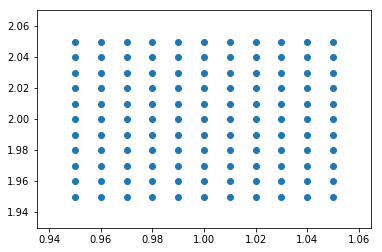

In [46]:
i = np.arange(1,12)
x = 0.95 + (i-1)/100
y = 1.95 + (i-1)/100
x1, y1 = np.meshgrid(x,y)
plt.scatter(x1,y1)

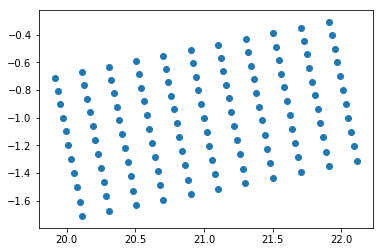

In [47]:
w = x1**2+5*y1**2
z = -5*x1**2+y1**2
plt.scatter(w,z)

In [48]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [63]:
ratio=PolyArea([w[0,0],w[0,10],w[10,10],w[10,0]],[z[0,0],z[0,10],z[10,10],z[10,0]])/PolyArea([x1[0,0],x1[0,10],x1[10,10],x1[10,0]],[y1[0,0],y1[0,10],y1[10,10],y1[10,0]])
ratio

207.99999999999503

## The approximated ratio is  208

## Jacobian factor is 208

## They are same

# problem 5

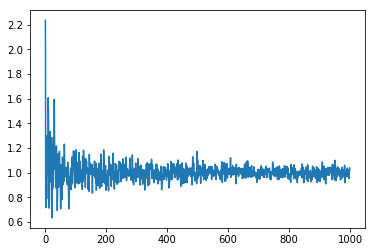

In [67]:
i = np.arange(1,1000)
mean = []
for n in i:
    mean.append(np.random.normal(loc=1,scale=1,size=n).mean())
plt.plot(i, mean)

## converge to 1

# problem 6

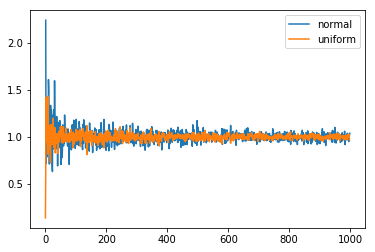

In [71]:
mean1=[]
for n in i:
    mean1.append(np.random.uniform(low=0,high=2,size=n).mean())
plt.plot(i,mean,mean1)
plt.legend(labels=['normal','uniform'],loc='best')

### uniform is faster

# problem 7

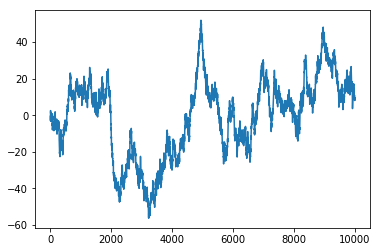

In [27]:
i=np.arange(1,10000)
set = []
mean = []
for n in i:
    set.append(np.random.normal(loc=0,scale=n))
    #print(set)
    mean.append(np.array(set).mean())
    #print(mean)
plt.plot(i, mean)

## It does not converge because as the n increase, the variance increase as well.